In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Data Importing, Preprocessing and Preparation

In [2]:
df=pd.read_csv('gait_data.csv')

In [3]:
df.head()

,Unnamed: 0,% Gait Cycle,Pelvic Ant/Posterior Tilt,Hip Flex/Extension,Hip Ad/Abduction,Hip Int/External Rotation,Knee Flex/Extension,Ankle Dorsi/Plantarflexion,Position
0,NORMAL,0%,-2.8,27.9,0.5,0.3,8.8,-21.9,NORMAL
1,NaN,1%,-2.8,27.8,0.9,0.6,10.2,-22.5,NORMAL
2,NaN,2%,-2.8,27.7,1.4,1.0,11.5,-23.1,NORMAL
3,NaN,3%,-2.7,27.6,1.9,1.4,12.9,-23.7,NORMAL
4,NaN,4%,-2.7,27.5,2.5,1.8,14.5,-24.1,NORMAL


In [4]:
df = df.drop(df.columns[[0]], axis=1) 

In [5]:
df

,% Gait Cycle,Pelvic Ant/Posterior Tilt,Hip Flex/Extension,Hip Ad/Abduction,Hip Int/External Rotation,Knee Flex/Extension,Ankle Dorsi/Plantarflexion,Position
0,0%,-2.8,27.9,0.5,0.3,8.8,-21.9,NORMAL
1,1%,-2.8,27.8,0.9,0.6,10.2,-22.5,NORMAL
2,2%,-2.8,27.7,1.4,1.0,11.5,-23.1,NORMAL
3,3%,-2.7,27.6,1.9,1.4,12.9,-23.7,NORMAL
4,4%,-2.7,27.5,2.5,1.8,14.5,-24.1,NORMAL
...,...,...,...,...,...,...,...,...
904,96%,-3.6,24.8,1.9,2.9,31.0,-19.9,STAIRCASE DESCENDING
905,97%,-3.6,23.6,1.9,3.0,28.2,-20.5,STAIRCASE DESCENDING
906,98%,-3.6,22.4,1.8,3.2,25.9,-20.9,STAIRCASE DESCENDING
907,99%,-3.5,21.1,1.8,3.5,24.2,-20.7,STAIRCASE DESCENDING


In [6]:
df['% Gait Cycle']=df['% Gait Cycle'].map(lambda x: x.rstrip("%") )

In [7]:
#Train-Test Spillting
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(df,test_size=0.15,random_state=42)

In [8]:
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:772
Rows in test set:137



In [9]:
train_set_labels=train_set['Position'].copy()
train_set=train_set.drop('Position',axis=1).copy()
test_set_labels=test_set['Position'].copy()
test_set=test_set.drop('Position',axis=1).copy()

In [10]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
train_set = scaler.fit_transform(train_set)
scaler = MinMaxScaler(feature_range=(-1, 1))
test_set = scaler.fit_transform(test_set)

In [11]:
#Spiltting into Train, Validation and Test
train_set,val_set,train_set_labels,val_set_labels=train_test_split(train_set,train_set_labels,test_size=0.10,random_state=42)

In [12]:
print(f"Rows in train set:{len(train_set)}\nRows in validation set:{len(test_set)}\nRows in test set:{len(val_set)}\n")

Rows in train set:694
Rows in validation set:137
Rows in test set:78



In [13]:
#Encoding the target variable
from sklearn.preprocessing import LabelEncoder
train_set_labels = LabelEncoder().fit_transform(train_set_labels)
val_set_labels = LabelEncoder().fit_transform(val_set_labels)
test_set_labels = LabelEncoder().fit_transform(test_set_labels)


# Extreme Learning Machine (ELM) implementation
The ELM algorithm is similar to other neural networks with 3 key differences:

1.The number of hidden units is usually larger than in other neural networks that are trained using backpropagation.

2.The weights from input to hidden layer are randomly generated, usually using values from a continuous uniform distribution.

3.The output neurons are linear rather than sigmoidal, this means we can use least square errors regression to solve the output weights.

Installation:
pip install git+https://github.com/masaponto/python-elm

ELM Training Accuracy 0.886 
ELM Validation Accuracy 0.910 
ELM Testing Accuracy 0.686 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      1.00      1.00        12
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00         8
           4       0.75      1.00      0.86         9
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        10
           7       0.78      1.00      0.88         7
           8       0.91      1.00      0.95        10

    accuracy                           0.91        78
   macro avg       0.82      0.89      0.85        78
weighted avg       0.84      0.91      0.87        78



/Users/pawelpratyush/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


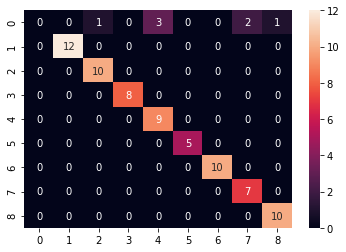

In [14]:
from elm import ELM
elm = ELM(hid_num=100000).fit(train_set, train_set_labels)
print("ELM Training Accuracy %0.3f " % elm.score(train_set,train_set_labels))
print("ELM Validation Accuracy %0.3f " % elm.score(val_set,val_set_labels))
print("ELM Testing Accuracy %0.3f " % elm.score(test_set,test_set_labels))
validation_prediction=elm.predict(val_set)
print(classification_report(val_set_labels, validation_prediction))
sns.heatmap(confusion_matrix(val_set_labels, validation_prediction),annot=True,fmt="d")

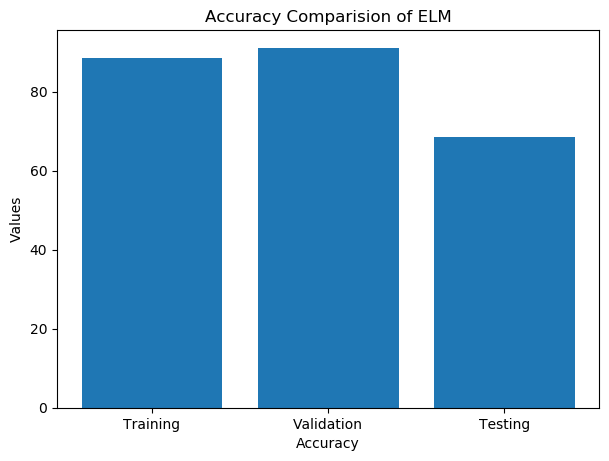

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
a=elm.score(train_set,train_set_labels)*100
b=elm.score(val_set,val_set_labels)*100
c=elm.score(test_set,test_set_labels)*100
y=[a,b,c]
x=['Training','Validation','Testing']
plt.bar(x,y)
plt.xlabel('Accuracy')
plt.ylabel("Values")
plt.title('Accuracy Comparision of ELM')
plt.show()

# Ensemble Learning (Random Forest Classifier)

Random Forest Training Score: 
 100.0
Random Forest Validation Score: 
 98.72
Random Forest Test Score: 
 94.16
Accuracy: 
 0.9871794871794872
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         8
           4       1.00      0.89      0.94         9
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        10

    accuracy                           0.99        78
   macro avg       0.99      0.99      0.99        78
weighted avg       0.99      0.99      0.99        78



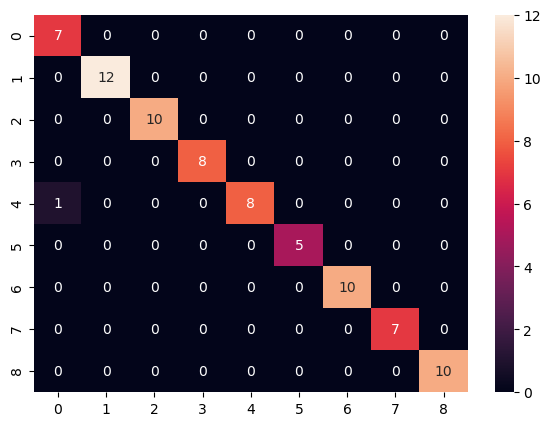

In [16]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_set, train_set_labels)
#Predict Output
rf_predicted = random_forest.predict(val_set)
random_forest_score = round(random_forest.score(train_set, train_set_labels) * 100, 2)
random_forest_score_val =round(random_forest.score(val_set, val_set_labels) * 100, 2)
random_forest_score_test = round(random_forest.score(test_set, test_set_labels) * 100, 2)
print('Random Forest Training Score: \n', random_forest_score)
print('Random Forest Validation Score: \n', random_forest_score_val)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(val_set_labels,rf_predicted))
print(classification_report(val_set_labels,rf_predicted))
sns.heatmap(confusion_matrix(val_set_labels,rf_predicted),annot=True,fmt="d")

# Multilayer Perceptron (ANN)

MLP classifier Training Score: 
 100.0
MLP classifier Validation Score: 
 100.0
MLP classifier Test Score: 
 100.0
Accuracy: 
 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        10

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



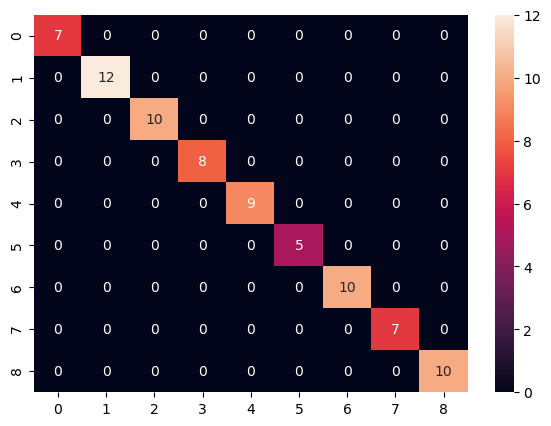

In [17]:
#MLP classifier
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50,50,50),activation='tanh', max_iter=500, alpha=1e-4,
                     solver='lbfgs', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(train_set,train_set_labels)
#Predict Output 
y_pred = clf.predict(val_set)
mlp_score = round(clf.score(train_set, train_set_labels) * 100, 2)
mlp_score_test = round(clf.score(test_set, test_set_labels) * 100, 2)
mlp_score_val =  round(clf.score(val_set, val_set_labels) * 100, 2)
print('MLP classifier Training Score: \n', mlp_score)
print('MLP classifier Validation Score: \n', mlp_score_val)
print('MLP classifier Test Score: \n', mlp_score_test)
print('Accuracy: \n', accuracy_score(val_set_labels,y_pred))
print(classification_report(val_set_labels,y_pred))
sns.heatmap(confusion_matrix(val_set_labels,y_pred),annot=True,fmt="d")

# SVM Classifier

SVM Training Score: 
 80.98
SVM Validation Score: 
 82.05
SVM Test Score: 
 67.88
Accuracy: 
 0.8205128205128205
Classification Report: 
               precision    recall  f1-score   support

           0       0.33      0.71      0.45         7
           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         8
           4       0.57      0.44      0.50         9
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        10
           7       1.00      0.14      0.25         7
           8       0.91      1.00      0.95        10

    accuracy                           0.82        78
   macro avg       0.87      0.80      0.79        78
weighted avg       0.88      0.82      0.81        78



/Users/pawelpratyush/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


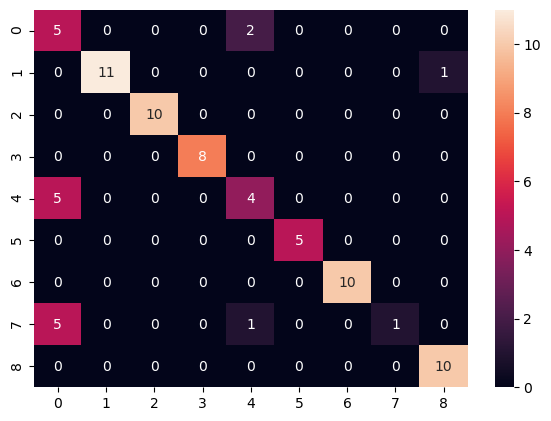

In [18]:
from sklearn.svm import SVC
svc = SVC()
# Train the model using the training sets and check score
svc.fit(train_set, train_set_labels)
#Predict Output
svc_predicted= svc.predict(val_set)
svc_score = round(svc.score(train_set, train_set_labels) * 100, 2)
svc_score_val = round(svc.score(val_set, val_set_labels) * 100, 2)
svc_score_test = round(svc.score(test_set, test_set_labels) * 100, 2)
print('SVM Training Score: \n', svc_score)
print('SVM Validation Score: \n', svc_score_val)
print('SVM Test Score: \n', svc_score_test)
print('Accuracy: \n', accuracy_score(val_set_labels,svc_predicted))
print('Classification Report: \n', classification_report(val_set_labels,svc_predicted))

sns.heatmap(confusion_matrix(val_set_labels,svc_predicted),annot=True,fmt="d")

# Model Comparision

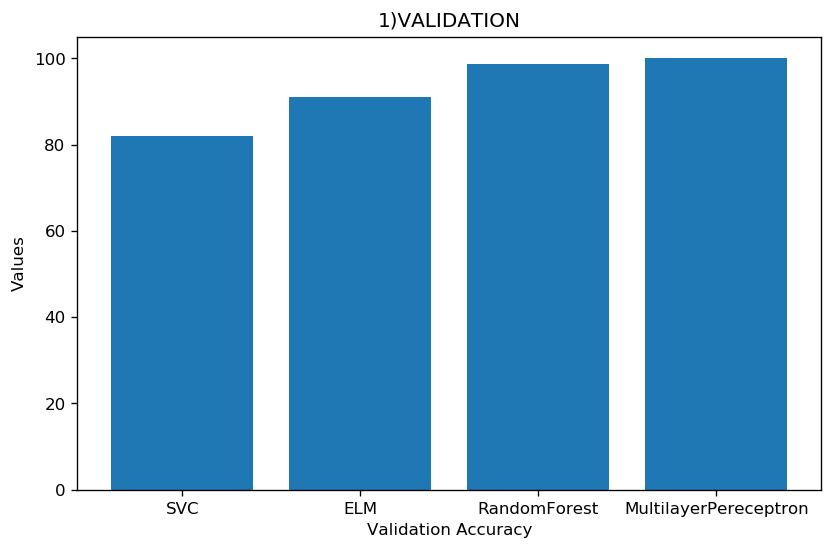

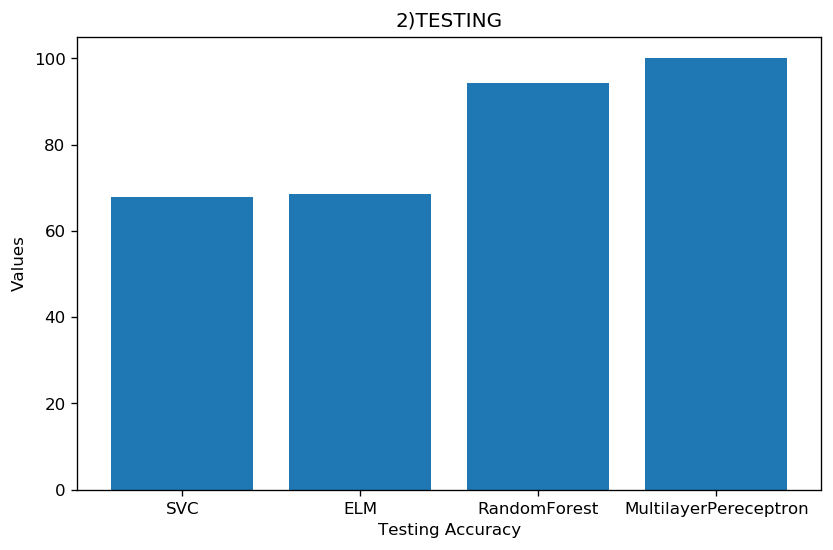

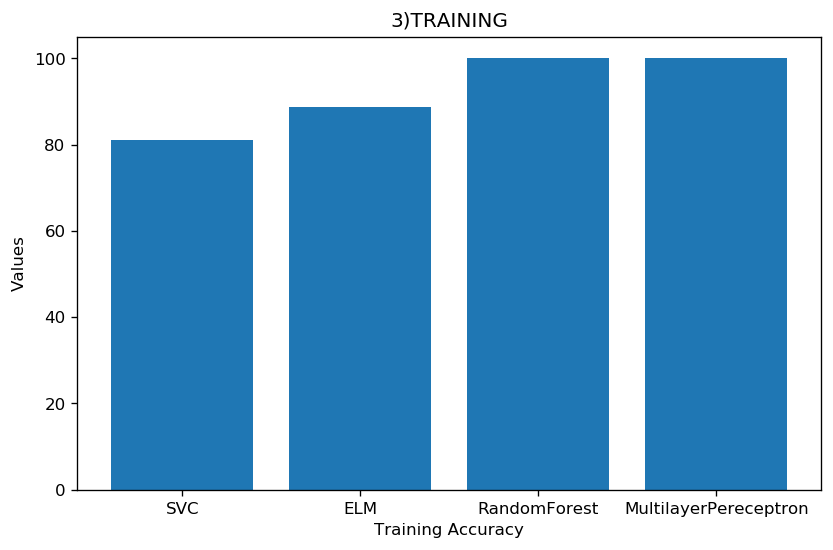

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':120})
a=svc_score_val
b=round(elm.score(val_set,val_set_labels)*100,2)
c=random_forest_score_val
d=mlp_score_val
y=[a,b,c,d]
x=['SVC','ELM','RandomForest','MultilayerPereceptron']
plt.bar(x,y)
plt.xlabel('Validation Accuracy')
plt.ylabel("Values")
plt.title('1)VALIDATION')
plt.show()
a=svc_score_test
b=round(elm.score(test_set,test_set_labels)*100,2)
c=random_forest_score_test
d=mlp_score_test
y=[a,b,c,d]
x=['SVC','ELM','RandomForest','MultilayerPereceptron']
plt.bar(x,y)
plt.xlabel('Testing Accuracy')
plt.ylabel("Values")
plt.title('2)TESTING')
plt.show()
a=svc_score
b=round(elm.score(train_set,train_set_labels)*100,2)
c=random_forest_score
d=mlp_score
y=[a,b,c,d]
x=['SVC','ELM','RandomForest','MultilayerPereceptron']
plt.bar(x,y)
plt.xlabel('Training Accuracy')
plt.ylabel("Values")
plt.title('3)TRAINING')
plt.show()